In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
# drop unnecesary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
#check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

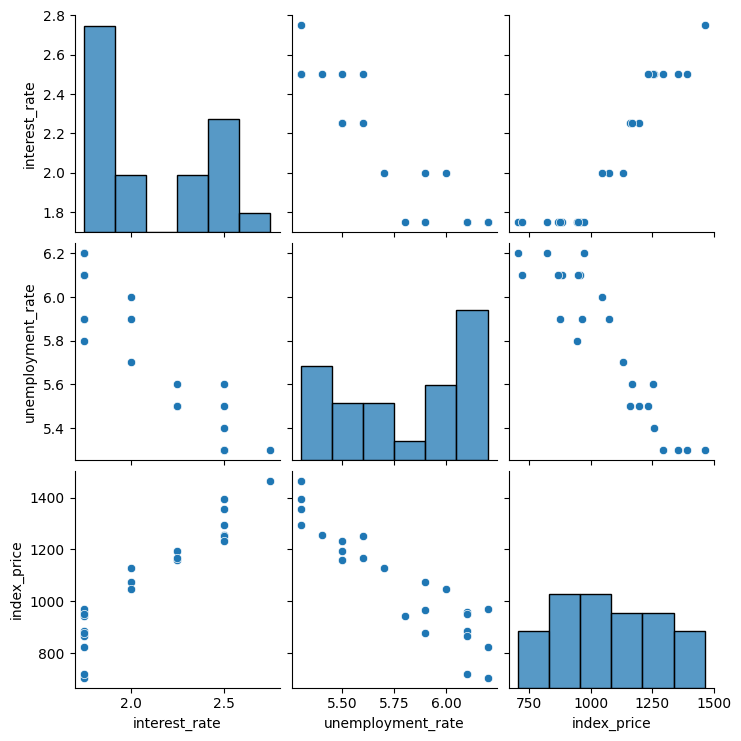

In [9]:
# visualization
import seaborn as sns
sns.pairplot(df_index)

In [10]:
# finding correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

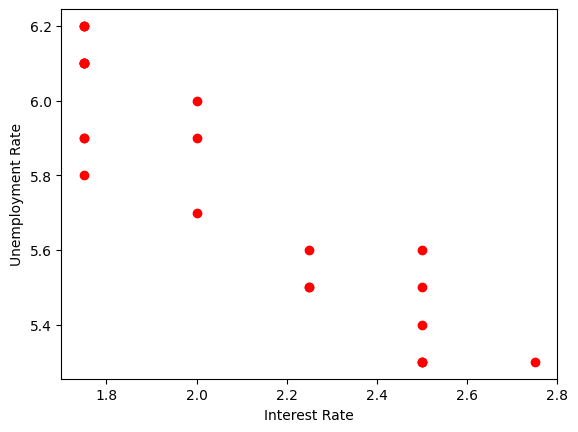

In [11]:
# visualizing better
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")


In [13]:
# Getting the independent and dependent features
X = df_index.iloc[:,:-1] # all the rows except the last feature
Y = df_index.iloc[:,-1]  # last feature only in Series 

In [14]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [15]:
Y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [16]:
# train test split
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

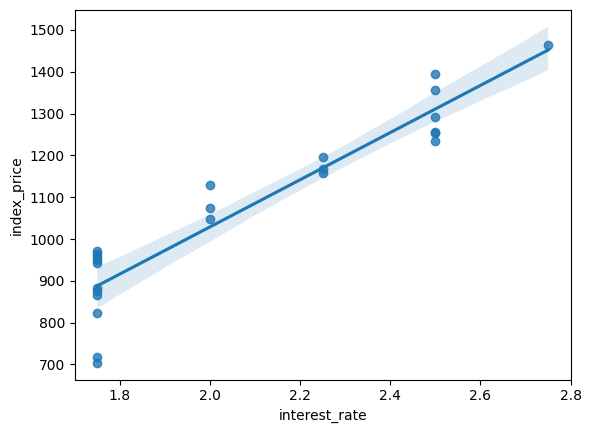

In [22]:
# just visualizing using regplot
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

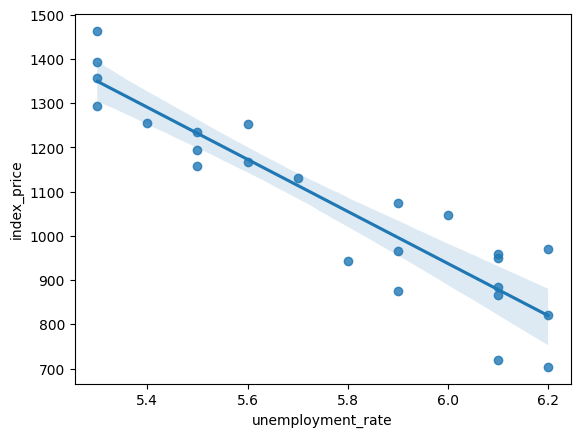

In [23]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

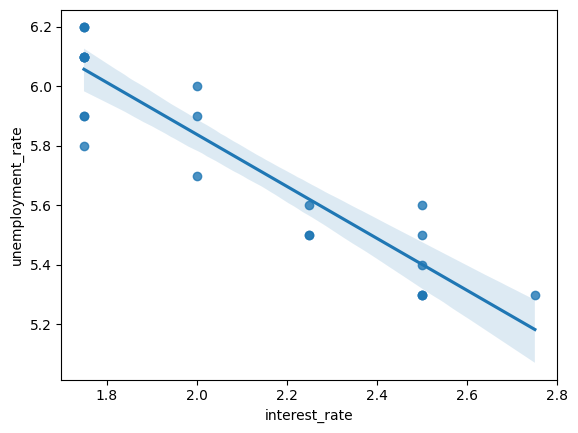

In [25]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

# regplot compares only two features at a time, so we can visualize the relationship between any two features in the dataset.

In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train    # 2-D array

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [31]:
# building the model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [32]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
# doing the cross validation -> it means to split the training data into again train and test parts based on the cv parameter and calculate scoring for the number of times specified in cv
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)  # estimates means our model the first parameeter

In [37]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [38]:
np.mean(validation_score)  # mean of the validation score

np.float64(-5914.828180162386)

In [39]:
# prediction
Y_pred = regression.predict(X_test)
Y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [41]:
# finding the performance metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)      # just remember what formula does if you forget which parameters to give , its Actual and predicted dependent ones
mae = mean_absolute_error(Y_test,Y_pred)    
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 5793.762887712569
Mean Absolute Error: 59.935781523235484
Root Mean Squared Error: 76.11677139574805


In [42]:
score = r2_score(Y_test,Y_pred)
print(f"R2 Score: {score}")

R2 Score: 0.8278978091457145


In [43]:
# adjusted r square
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7131630152428576

## Assumptions

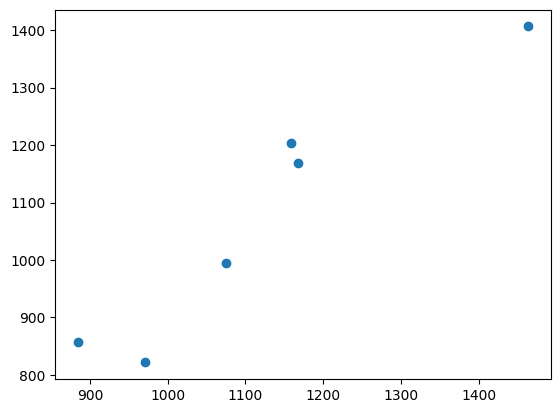

In [44]:
plt.scatter(Y_test,Y_pred)

In [45]:
# if there is a linear relationship between the actual and predicted values , it means the model is performing well. If the points are scattered, it means the model is not performing well.

In [46]:
# printing residuals i.e errors
residuals = Y_test - Y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


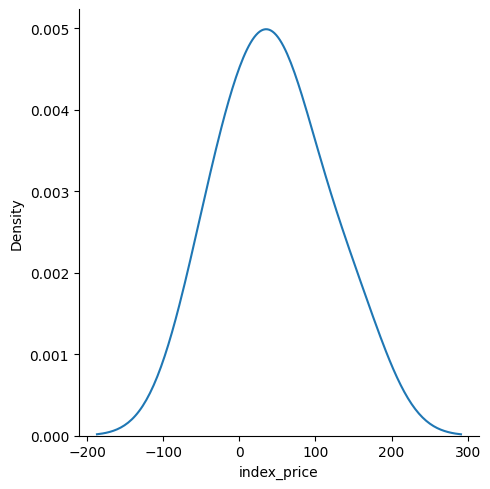

In [47]:
sns.displot(residuals,kind='kde')

In [48]:
# if you are getting a normal distribution of residuals, it means the model is performing well. If the distribution is skewed, it means the model is not performing well.

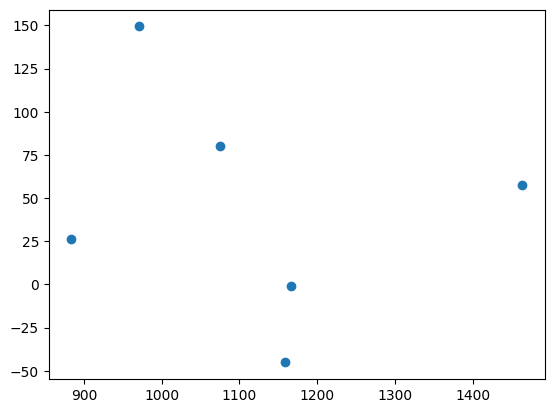

In [49]:
 # visualizing the residuals and the predicted values
plt.scatter(Y_test, residuals)

In [50]:
# Scattering of points is a good sign between predited values and the error

In [51]:
# Computing using OLS
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 18 Aug 2025   Prob (F-statistic):                       0.754
Time:                        19:19:28   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
regression.coef_
# we observe that coef is almost same in both methods.

array([  88.27275507, -116.25716066])

In [54]:
regression.intercept_

np.float64(1053.4444444444443)